# Index

1. Data Loading
2. Exploratory Data Analysis (EDA)
3. Regression Analysis with Continuous Variables Only
4. Regression Analysis with Categorical Variables
5. Regression Analysis with bith Continous and Categorical Variables
6. Regression Analysis with excluding Non-significant variables
7. Classification
> 7.1 Support Vector Classification

> 7.2 Random Forest Classifier

8. Feature Importance


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output

import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')             
def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

import os
print(os.listdir("../input"))


['WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv']


# 1. Data Loading

In [2]:
df = pd.read_csv('../input/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.shape

(9134, 24)

In [5]:
df.Response = df.Response.apply(lambda X : 0 if X == 'No' else 1)

In [6]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,0,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 2  2. Exploratory Data Analysis(EDA):

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null int64
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               9

In [8]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [9]:
df.describe()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,0.143201,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,0.350297,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,0.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,0.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,1.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# 2.1 Response Rate:

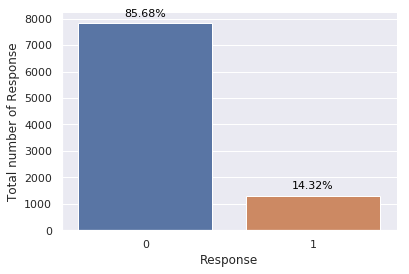

In [10]:
ax = sns.countplot('Response',data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

Notice that about 14% customers have responded to marketing calls, and the remaining 86% of the customers have not responded.

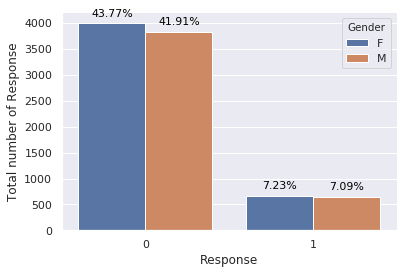

In [11]:
ax = sns.countplot('Response',hue = 'Gender' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

Notice that, ratio of male and female for **responding to a marketing call** is almost same.

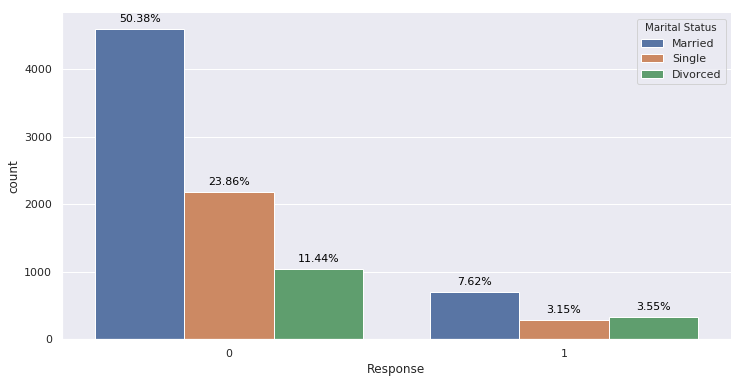

In [12]:
plt.figure(figsize=(12,6))
ax = sns.countplot('Response', hue = df['Marital Status'], data = df)
annot_plot(ax,0.08,1)
plt.show()

Notice that out of 14% customers, 8% customers those who rsponded to marketing calls are from married category. 

# 2.1.1 Response rate by renew offer

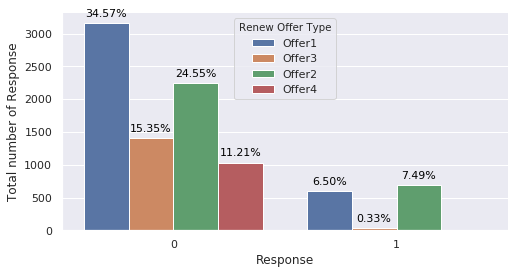

In [13]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response',hue = 'Renew Offer Type' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

For offer1 and offer2 customers have responded to marketing calls,but for offer3 and offer4 almost nobody responded.

# 2.1.2 Response rate by Education

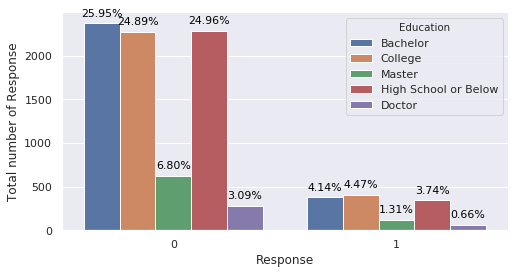

In [14]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response',hue = 'Education' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

Notice that customers with Doctor and master degree are very less who responded to marketing calls, may be they are not intersted or busy. or we can say young people are most likely to respond to marketing calls.

# 2.1.3 Response rate by Sales Channel

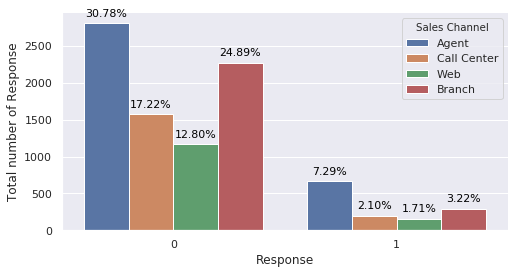

In [15]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response',hue = 'Sales Channel' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

# 2.1.4 Response rate by Total Claim Amount

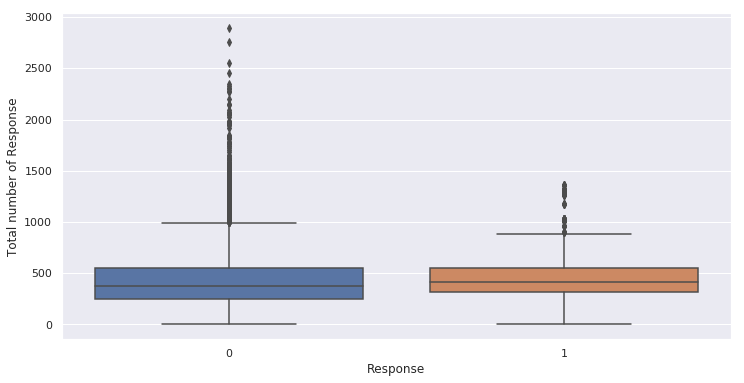

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Total Claim Amount' , x = 'Response', data = df)
plt.ylabel('Total number of Response')
plt.show()

Box plots are a great way to visualize the distribuation of countinous variables. They show the min, max, first quatile, meadian and third quartile, all in one view. The central rectangle spans from the first quartile to the third quartile, and the green line shows the median. The lower and upper ends show the minimum and the maximum of each distribution.

   The dots above the upper boundry line show the suspected outliers that are decided based on the **INterquartile range (IQR)**. The points that fall **1.5*IQR** above the third quartile or **1.5*IQR** below the quartile are suspected outliers and are drawn with the dots.

# 2.1.5 Response rate by Income Distributions

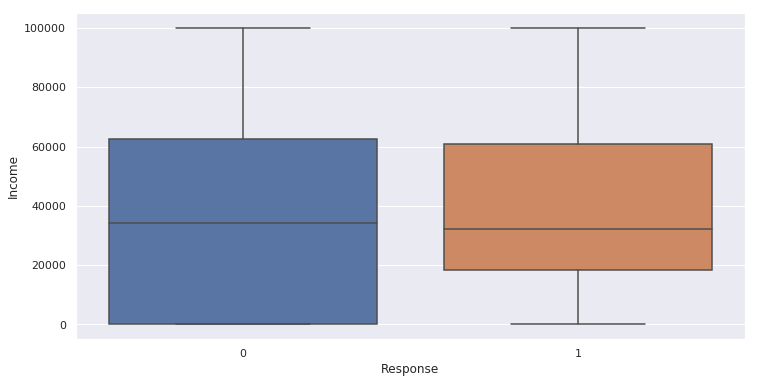

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Income' , x = 'Response', data = df)
plt.show()

# 2.1.6 Response rate by EmploymentStatus

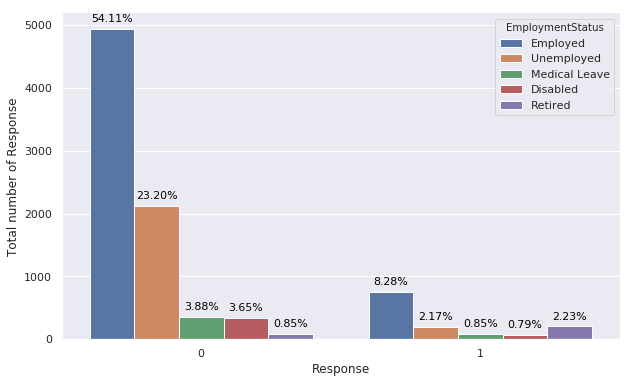

In [21]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Response',hue = 'EmploymentStatus' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

# 2.1.7 Response rate by Vehicle Class:

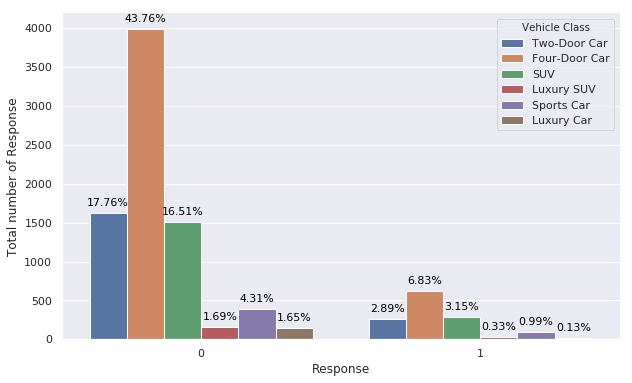

In [23]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Response',hue = 'Vehicle Class' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

# 2.1.8 Response rate by Policy:

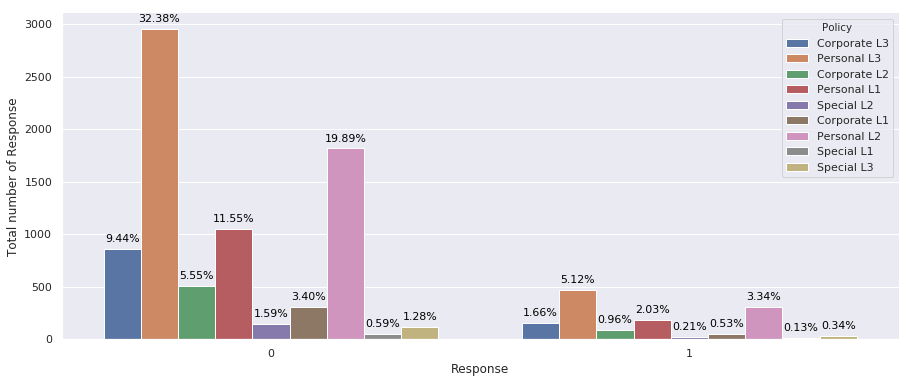

In [25]:
plt.figure(figsize=(15,6))
ax = sns.countplot('Response',hue = 'Policy' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

# 3. Regression Analysis with Continuous Variables Only

In [ ]:
import statsmodels.api as sm

In [ ]:
continous_var_df = df.select_dtypes(include=['int64','float'])
continous_var_df.nunique()

In [ ]:
continous_var_df.columns

In [ ]:
continous_var_reg = sm.Logit(continous_var_df['Response'], continous_var_df.drop('Response', axis = 1))
continous_var_reg.fit().summary()

By looking at the **p-value** of **'Income', 'Monthly Premium Auto','Months Since Last Claim', 'Months Since Policy Inception','Number of Open Complaints', 'Number of Policies'**, these input variables seems to have significant relationships with the output(target) variable 'Response'. By looking at the coeff,they are all **negatively correlated** to the Response variable.

**What Are P Values?**

P values evaluate how well the sample data support the devil’s advocate argument that the null hypothesis is true. It measures how compatible your data are with the null hypothesis. How likely is the effect observed in your sample data if the null hypothesis is true?

> **High P values: your data are likely with a true null.**

> **Low P values: your data are unlikely with a true null**

A low P value suggests that your sample provides enough evidence that you can reject the null hypothesis for the entire population.

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(continous_var_df.corr(), annot = True)
plt.show()

# 4.Regression Analysis with Categorical Variables

In [ ]:
categorical_df = df.select_dtypes(include='object')
cat_df = categorical_df.drop(['Customer','Effective To Date'], axis = 1)

In [ ]:
cat_df.nunique()

 # Conversion of Categorical data

In [ ]:
cat_df.columns

In [ ]:
cols = ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_df[cols]:
    cat_df[col] = lb.fit_transform(cat_df[col])

In [ ]:
cat_df.head()

In [ ]:
categorical_train = sm.Logit(continous_var_df.Response, cat_df)
categorical_train.fit().summary()

By looking at **p-value**,**'Marital Status','Renew Offer type','Sales channel','Vehicle size','policy'** variables are significant at 0.05 significance level, and all of them have negative relationship with the output variable, **Response**.

# 5. Regression Analysis with bith Continous and Categorical Variables.

In [ ]:
continous_var_df.reset_index(drop = True, inplace=True)
cat_df.reset_index(drop = True, inplace=True)

In [ ]:
all_data_df = pd.concat([continous_var_df,cat_df], axis = 1)

In [ ]:
all_data_df.head()

In [ ]:
total_train = sm.Logit(all_data_df.Response, all_data_df.drop(['Response'], axis = 1))
total_train.fit().summary()

By looking at the **p-value** of **'Customer lifetime value','Income', 'Monthly Premium Auto','Months Since Last Claim', 'Months Since Policy Inception','Number of Policies','Total claim amount','Marital Status','Renew offer type','Sales Channel','Vehicle size'**, these input variables seems to have significant relationships with the output(target) variable 'Response'. By looking at the coeff,they are all **negatively correlated** to the Response variable.

**Conclusion:** The higher the Customer Lifetime value is, the less likely that the customer will be response to marketing calls.

# 6. Regression Analysis with excluding Non-significant variables

In [ ]:
all_data_df.columns

In [ ]:
significant_cols = ['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim',
                    'Months Since Policy Inception','Number of Policies','Total Claim Amount','Marital Status',
                    'Renew Offer Type','Sales Channel','Vehicle Size']
trainData = sm.Logit(all_data_df.Response, all_data_df[significant_cols])
trainData.fit().summary()

## 7.Classification:

In [ ]:
y = all_data_df.Response
X = all_data_df.drop('Response', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
ax = sns.countplot(y_test)
annot_plot_num(ax,0.08,1)

## 7.1 SVC Classification

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print(confusion_matrix(svc_pred,y_test))
print('accuracy_score:',accuracy_score(svc_pred, y_test))
print(classification_report(svc_pred, y_test))

cross_val_score_svc = cross_validate(svc, X_train, y_train,cv = 5)
print('Cross validation train_score',cross_val_score_svc['train_score'].mean())
print('Cross validation test_score',cross_val_score_svc['test_score'].mean())


## 7.2.RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(rfc_pred,y_test))
print('Accuracy score:',accuracy_score(rfc_pred, y_test))
print(classification_report(rfc_pred, y_test))

cross_val_score_rfc = cross_validate(rfc, X_train, y_train,cv = 5)

print('Cross validation train_score',cross_val_score_rfc['train_score'].mean())
print('Cross validation test_score',cross_val_score_rfc['test_score'].mean())


## 8.Feature Importance

In [ ]:
feature_imp = rfc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp, index=X.columns).sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='deep')
plt.xlabel('relative importance')
plt.show()